### Data preparation
###### About file - mainSimulationAccessTraces:
This datasets contains communications between different IoT nodes. All these nodes are part of a common middle-ware, the DS2OS. The communications in the following file are gathered from 3 different IoT sites.

The nodes have an address (for example: /agent2/lightcontrol2) and are accessed by using it. They also have a type (for example: /lightControler) and a location (for example: BedroomParents).

There are different type of operations that can be performed using an access (for example "write").

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("mainSimulationAccessTraces.csv") # Load the Dataset
df.head(5) # Sample view of the dataset (first five rows)

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal


### Data Gaps
##### Additional work required with 2 columns (since there are missing values in the dataset):
- accessedNodeType
- value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357952 entries, 0 to 357951
Data columns (total 13 columns):
sourceID                     357952 non-null object
sourceAddress                357952 non-null object
sourceType                   357952 non-null object
sourceLocation               357952 non-null object
destinationServiceAddress    357952 non-null object
destinationServiceType       357952 non-null object
destinationLocation          357952 non-null object
accessedNodeAddress          357952 non-null object
accessedNodeType             357804 non-null object
operation                    357952 non-null object
value                        355902 non-null object
timestamp                    357952 non-null int64
normality                    357952 non-null object
dtypes: int64(1), object(12)
memory usage: 35.5+ MB


#### Find out how many values we have in each column.

In [5]:
def missing_values_(df):
        # Total Missed Values
        missing_values = df.isnull().sum()
        
        # % missing values
        percent_missing_values = 100 * df.isnull().sum() / len(df)
        
        table_missing_values = pd.concat([missing_values, percent_missing_values], axis=1)
        
        # Rename columns
        mis_val_table_rename_columns = table_missing_values.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort table by percentage of missing
        mis_val_table_rename_columns = mis_val_table_rename_columns[
            mis_val_table_rename_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_rename_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_rename_columns

In [6]:
missing_values_(df) 

Dataframe has 13 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
value,2050,0.6
accessedNodeType,148,0.0


In [7]:
df['accessedNodeType'] = df['accessedNodeType'].fillna(value='/Evil') # All missing values are classified as malicious traffic

In [8]:
df.loc[df.value=='none',"value"] = '0'
df.loc[df.value=='twenty',"value"] = '20.0'
df.loc[df.value=='false',"value"] = '0'
df.loc[df.value=='true',"value"] = '1'
df.loc[df.value=='0',"value"] = '0.0'
df['value'] = df['value'].fillna(value='60.0')

df = df.drop(df.index[df.value.str.contains("org.*")])
df.value = df.value.astype(float)

### Data visualization

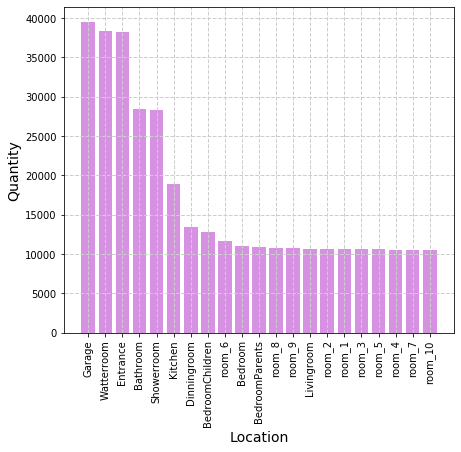

In [9]:
count_location = df.sourceLocation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.bar(count_location.index, count_location.values, color = '#d791e3')
plt.grid(color = '#CDCDCD',
         linewidth = 1, 
         linestyle = '--')

plt.ylabel('Quantity', fontsize=14)
plt.xlabel('Location', fontsize=14)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [10]:
for i,k in zip(count_location.index,count_location.values):
    print(i,k)

Garage 39499
Watterroom 38368
Entrance 38217
Bathroom 28461
Showerroom 28315
Kitchen 18962
Dinningroom 13429
BedroomChildren 12836
room_6 11642
Bedroom 11009
BedroomParents 10946
room_8 10798
room_9 10752
Livingroom 10620
room_2 10606
room_1 10601
room_3 10597
room_5 10596
room_4 10572
room_7 10558
room_10 10557


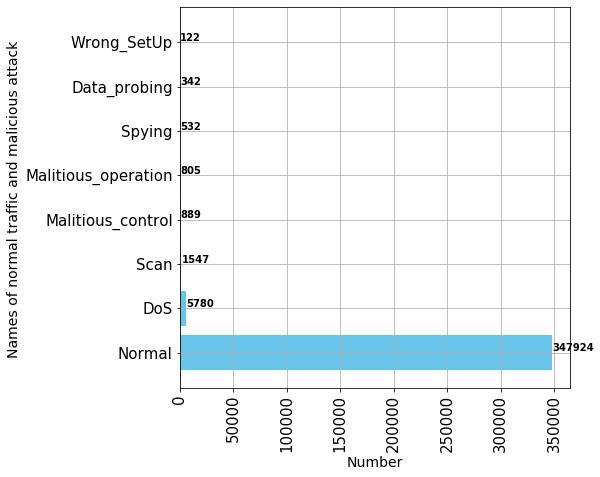

In [11]:
normality_count = df.normality.value_counts()
indices = ['Normal', 'DoS', 'Scan', 'Malitious_control', 'Malitious_operation', 'Spying', 'Data_probing', 'Wrong_SetUp']
plt.figure(figsize=(7,7))
ax=plt.subplot(111)
plt.grid()
plt.barh(indices, normality_count.values, 
         color = '#68c4e8')
plt.xlabel('Number', fontsize=14)
plt.ylabel('Names of normal traffic and malicious attack ', fontsize=14)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)

for i, v in enumerate(normality_count.values):
    ax.text(v + 3, i + .03, str(v), color='black', fontweight='bold')
plt.show()

In [12]:
print(normality_count.index)
print(normality_count.values)

Index(['normal', 'anomalous(DoSattack)', 'anomalous(scan)',
       'anomalous(malitiousControl)', 'anomalous(malitiousOperation)',
       'anomalous(spying)', 'anomalous(dataProbing)', 'anomalous(wrongSetUp)'],
      dtype='object')
[347924   5780   1547    889    805    532    342    122]


In [13]:
for i,k in zip(normality_count.index,normality_count.values):
    print(i,k)

normal 347924
anomalous(DoSattack) 5780
anomalous(scan) 1547
anomalous(malitiousControl) 889
anomalous(malitiousOperation) 805
anomalous(spying) 532
anomalous(dataProbing) 342
anomalous(wrongSetUp) 122


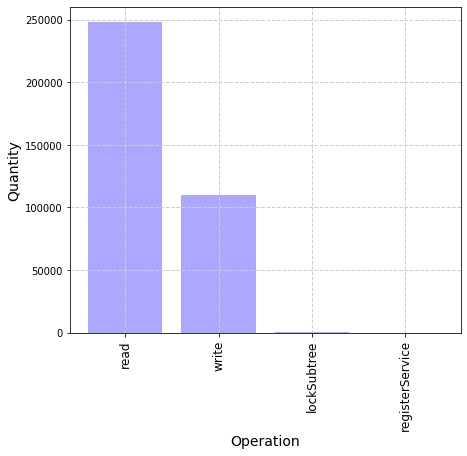

In [14]:
count_operation = df.operation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.bar(count_operation.index, count_operation.values, color = '#ada8ff')
plt.grid(color = '#CDCDCD',
         linewidth = 1, 
         linestyle = '--')

plt.ylabel('Quantity', fontsize=14)
plt.xlabel('Operation', fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=10)
plt.show()

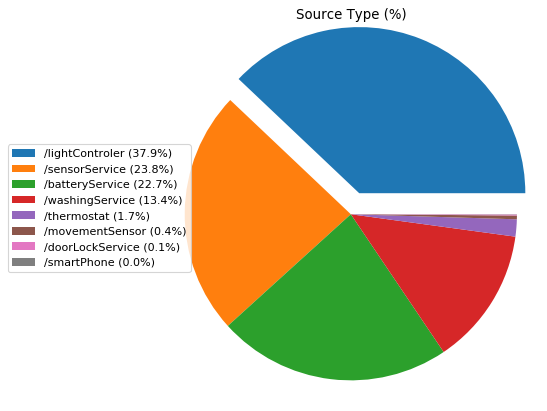

In [15]:
data_names = ["/lightControler",
"/sensorService",
"/batteryService",
"/washingService",
"/thermostat",
"/movementSensor",
"/doorLockService",
"/smartPhone"]
data_val = [135775,
85196,
81267,
47986,
5980,
1301,
330,
106]

total = sum(data_val)
labels = [f"{n} ({v/total:.1%})" for n,v in zip(data_names, data_val)]

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (700 / dpi, 500 / dpi) )


plt.title('Source Type (%)')

plt.pie(
    data_val, radius=1.1,
    explode=[0.15] + [0 for _ in range(len(data_names) - 1)] )
plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    loc = 'best', labels = labels )

In [16]:
source = df.sourceType.value_counts()

print("source_name", source.index)
print("source_values", source.values)

source_name Index(['/lightControler', '/sensorService', '/batteryService',
       '/washingService', '/thermostat', '/movementSensor', '/doorLockService',
       '/smartPhone'],
      dtype='object')
source_values [135775  85196  81267  47986   5980   1301    330    106]


In [17]:
df_X = df.drop('timestamp',axis=1)
df_X.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,0.0,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,0.0,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,0.0,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,0.0,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,0.0,normal


### LabelEncoder & OneHotEncoder

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


labelencoder_column_0 = LabelEncoder()
labelencoder_column_1 = LabelEncoder()
labelencoder_column_4 = LabelEncoder()
labelencoder_column_7 = LabelEncoder()
labelencoder_y = LabelEncoder()

X_column_0 = df_X.iloc[:,0].values
X0 = labelencoder_column_0.fit_transform(X_column_0)
X0 = X0.reshape(len(X_column_0),1)


X_column_1 = df_X.iloc[:,1].values
X1 = labelencoder_column_1.fit_transform(X_column_1)
X1 = X1.reshape(len(X_column_1),1)

X_column_4 = df_X.iloc[:,4].values
X4 = labelencoder_column_4.fit_transform(X_column_4)
X4 = X4.reshape(len(X_column_4),1)

X_column_7 = df_X.iloc[:,7].values
X7 = labelencoder_column_7.fit_transform(X_column_7)
X7 = X7.reshape(len(X_column_7),1)

y = df_X.iloc[:,11].values
y = labelencoder_y.fit_transform(y)

In [19]:
enc_column_2 = OneHotEncoder()
enc_column_3 = OneHotEncoder()
enc_column_5 = OneHotEncoder()
enc_column_6 = OneHotEncoder()
enc_column_8 = OneHotEncoder()
enc_column_9 = OneHotEncoder()
label_2 = LabelEncoder()
label_3 = LabelEncoder()
label_5 = LabelEncoder()
label_6 = LabelEncoder()
label_8 = LabelEncoder()
label_9 = LabelEncoder()

X2 = df_X.iloc[:,2].values
X3 = df_X.iloc[:,3].values
X5 = df_X.iloc[:,5].values
X6 = df_X.iloc[:,6].values
X8 = df_X.iloc[:,8].values
X9 = df_X.iloc[:,9].values
X10 = df_X.iloc[:,10].values

X2 = label_2.fit_transform(X2)
X2 = X2.reshape(len(X2),1)
X3 = label_3.fit_transform(X3)
X3 = X3.reshape(len(X3),1)
X5 = label_5.fit_transform(X5)
X5 = X5.reshape(len(X5),1)
X6 = label_6.fit_transform(X6)
X6 = X6.reshape(len(X6),1)
X8 = label_8.fit_transform(X8)
X8 = X8.reshape(len(X8),1)
X9 = label_9.fit_transform(X9)
X9 = X9.reshape(len(X9),1)
X10 = X10.reshape(len(X10),1)

X = np.concatenate((X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10),axis=1)
X

array([[21.    , 30.    ,  2.    , ...,  7.    ,  2.    ,  0.    ],
       [32.    , 70.    ,  2.    , ...,  7.    ,  2.    ,  0.    ],
       [15.    ,  1.    ,  2.    , ...,  7.    ,  2.    ,  0.    ],
       ...,
       [82.    , 14.    ,  7.    , ...,  3.    ,  1.    ,  1.    ],
       [30.    , 62.    ,  2.    , ...,  5.    ,  1.    ,  0.    ],
       [30.    , 62.    ,  2.    , ...,  9.    ,  1.    , 20.4131]])

In [20]:
labelencoder_y.classes_

array(['anomalous(DoSattack)', 'anomalous(dataProbing)',
       'anomalous(malitiousControl)', 'anomalous(malitiousOperation)',
       'anomalous(scan)', 'anomalous(spying)', 'anomalous(wrongSetUp)',
       'normal'], dtype=object)

In [21]:
y2 = y.reshape(len(y),1)
data = np.concatenate((y2,X),axis=1)
df_data = pd.DataFrame(data)
df_data.to_csv('df_next.csv')